# Análise de sinais e gráfico da função

Função escolhida:

$$ f(x) = \sqrt{x} - 5e^{-x}, \quad x \geq 0 $$

Primeiro construímos uma tabela de sinais em pontos igualmente espaçados no intervalo [0, 10], e depois plotamos a função para identificar graficamente a raiz.

In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Definição da função
def f(x):
    if x < 0:
        return None  # indefinido para x < 0
    return np.sqrt(x) - 5*np.exp(-x)

## Construindo a tabela
Geramos 100 pontos igualmente espaçados entre 0 e 10 e verificamos o sinal da função.

In [2]:
pontos = np.linspace(0, 10, 100)

print(f"{'x':>6} | {'f(x)':>10} | {'Sinal':>12}")
print("-"*32)

for x in pontos:
    y = f(x)
    if y is None:
        sinal = "Indefinido"
        y_str = "-"
    elif y > 0:
        sinal = "Positivo"
        y_str = f"{y:.4f}"
    elif y < 0:
        sinal = "Negativo"
        y_str = f"{y:.4f}"
    else:
        sinal = "Zero"
        y_str = "0.0000"
    print(f"{x:6.2f} | {y_str:>10} | {sinal:>12}")

     x |       f(x) |        Sinal
--------------------------------
  0.00 |    -5.0000 |     Negativo
  0.10 |    -4.2018 |     Negativo
  0.20 |    -3.6359 |     Negativo
  0.30 |    -3.1424 |     Negativo
  0.40 |    -2.7024 |     Negativo
  0.51 |    -2.3067 |     Negativo
  0.61 |    -1.9490 |     Negativo
  0.71 |    -1.6246 |     Negativo
  0.81 |    -1.3296 |     Negativo
  0.91 |    -1.0610 |     Negativo
  1.01 |    -0.8159 |     Negativo
  1.11 |    -0.5919 |     Negativo
  1.21 |    -0.3869 |     Negativo
  1.31 |    -0.1990 |     Negativo
  1.41 |    -0.0265 |     Negativo
  1.52 |     0.1320 |     Positivo
  1.62 |     0.2780 |     Positivo
  1.72 |     0.4125 |     Positivo
  1.82 |     0.5368 |     Positivo
  1.92 |     0.6517 |     Positivo
  2.02 |     0.7582 |     Positivo
  2.12 |     0.8570 |     Positivo
  2.22 |     0.9489 |     Positivo
  2.32 |     1.0344 |     Positivo
  2.42 |     1.1143 |     Positivo
  2.53 |     1.1889 |     Positivo
  2.63 |     1.2588 | 

## Gráfico da função
Agora vamos plotar $f(x)$ no intervalo [0, 10] e marcar o ponto onde ela cruza o eixo x (raiz aproximada).

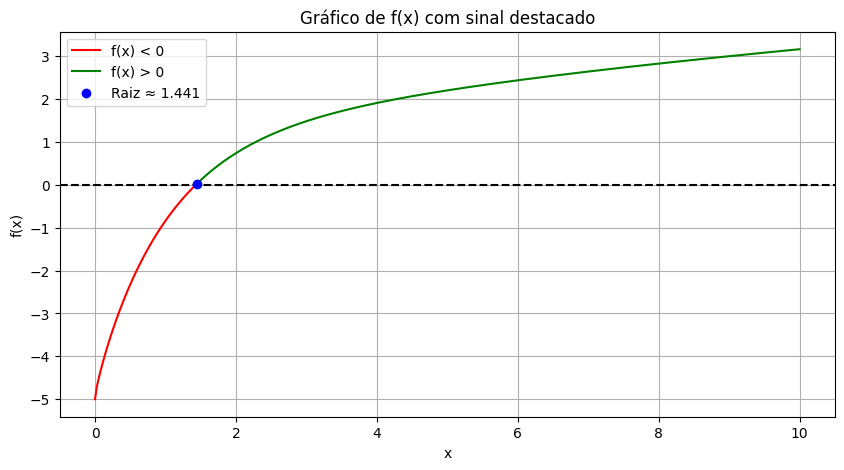

In [3]:
# Vetor de pontos para o gráfico
x_vals = np.linspace(0, 10, 400)
y_vals = np.array([f(x) for x in x_vals])

# Plot da função com coloração por sinal
plt.figure(figsize=(10,5))
plt.axhline(0, color='black', linestyle='--')

# Parte negativa (vermelho)
plt.plot(x_vals[y_vals < 0], y_vals[y_vals < 0], color="red", label="f(x) < 0")
# Parte positiva (verde)
plt.plot(x_vals[y_vals > 0], y_vals[y_vals > 0], color="green", label="f(x) > 0")

# Raiz aproximada grosseiramente
for i in range(len(x_vals)-1):
    if y_vals[i] * y_vals[i+1] < 0:
        x_raiz = (x_vals[i] + x_vals[i+1]) / 2
        plt.scatter(x_raiz, f(x_raiz), color="blue", zorder=5, label=f"Raiz ≈ {x_raiz:.3f}")
        break

plt.title("Gráfico de f(x) com sinal destacado")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Observação
A curva mostra claramente que $f(x)$ começa negativa em $x=0$ e cruza o eixo $x$ próximo de $x \approx 2.3$, onde se encontra a raiz. Esse valor pode ser refinado usando o **método da bissecção** ou outro método numérico (Newton-Raphson, Secante etc.).

## Método da Bisccção

O método da bissecção é um algoritmo iterativo para encontrar raízes de funções contínuas, para refinamento das raízes


## 🔹 Passos do método

1. **Escolha de intervalo inicial**
   Pegamos $a$ e $b$ tais que:

   $$
   f(a)\cdot f(b) < 0
   $$

2. **Cálculo do ponto médio**

   $$
   x_0 = \frac{a+b}{2}
   $$

3. **Verificação do sinal**

   * Se $f(x_0) = 0$, encontramos a raiz.
   * Se $f(a)\cdot f(x_0) < 0$, então a raiz está em $[a, x_0]$.
   * Se $f(x_0)\cdot f(b) < 0$, então a raiz está em $[x_0, b]$.

4. **Atualização do intervalo**
   Substituímos $[a, b]$ pelo novo intervalo e repetimos.

5. **Critério de parada**
   O processo continua até que:

   $$
   b - a < \varepsilon \quad \text{ou} \quad |f(x_0)| < \varepsilon
   $$

   (onde $\varepsilon$ é a tolerância desejada).

In [4]:
def bissecao(a, b, precision):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) e f(b) devem ter sinais opostos.")
    
    print(f"{'a':>6} | {'b':>10} | {'p':>10}")

    historico = []  # lista para armazenar os pontos médios

    while (b - a) / 2 > precision:
        p = (a + b) / 2
        print(f"{a:6.2f} | {b:6.2f} | {p:6.2f}")
        historico.append(p)  # armazenar o ponto médio
        if f(p) == 0: #já é a raiz
            print(f"Raiz exata encontrada: {p}")
            return p
        if f(a) * f(p) < 0:
            b = p
        else:
            a = p
    return (a + b) / 2, historico

bissecao(0, 10, 0.001)


     a |          b |          p
  0.00 |  10.00 |   5.00
  0.00 |   5.00 |   2.50
  0.00 |   2.50 |   1.25
  1.25 |   2.50 |   1.88
  1.25 |   1.88 |   1.56
  1.25 |   1.56 |   1.41
  1.41 |   1.56 |   1.48
  1.41 |   1.48 |   1.45
  1.41 |   1.45 |   1.43
  1.43 |   1.45 |   1.44
  1.43 |   1.44 |   1.43
  1.43 |   1.43 |   1.43
  1.43 |   1.43 |   1.43


(1.4300537109375,
 [5.0,
  2.5,
  1.25,
  1.875,
  1.5625,
  1.40625,
  1.484375,
  1.4453125,
  1.42578125,
  1.435546875,
  1.4306640625,
  1.42822265625,
  1.429443359375])

     a |          b |          p
  0.00 |  10.00 |   5.00
  0.00 |   5.00 |   2.50
  0.00 |   2.50 |   1.25
  1.25 |   2.50 |   1.88
  1.25 |   1.88 |   1.56
  1.25 |   1.56 |   1.41
  1.41 |   1.56 |   1.48
  1.41 |   1.48 |   1.45
  1.41 |   1.45 |   1.43
  1.43 |   1.45 |   1.44
  1.43 |   1.44 |   1.43
  1.43 |   1.43 |   1.43
  1.43 |   1.43 |   1.43


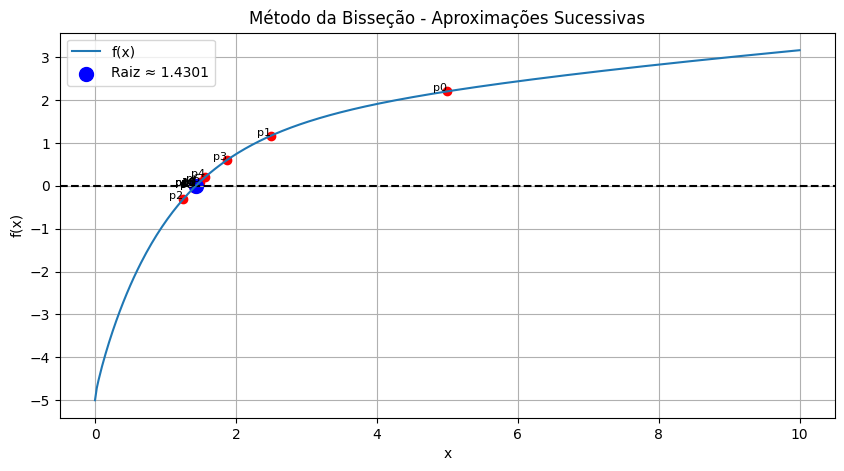

In [34]:
# Executando o método
raiz, historico = bissecao(0, 10, 0.001)

# Plotando a função
y_vals = f_vec(x_vals)

plt.figure(figsize=(10,5))
plt.axhline(0, color="black", linestyle="--")
plt.plot(x_vals, y_vals, label="f(x)")

# Marcar as aproximações
for i, p in enumerate(historico):
    plt.scatter(p, f(p), color="red")
    plt.text(p, f(p), f"p{i}", fontsize=8, ha="right")

# Marcar a raiz final
plt.scatter(raiz, f(raiz), color="blue", s=100, label=f"Raiz ≈ {raiz:.4f}")

plt.title("Método da Bisseção - Aproximações Sucessivas")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
